# Task 1

# Principal Component Analysis
Reduction of dimensionality

[0.33182575 0.64624622 0.83624272 0.91003953 0.95678411]


Text(0, 0.5, 'explained variance')

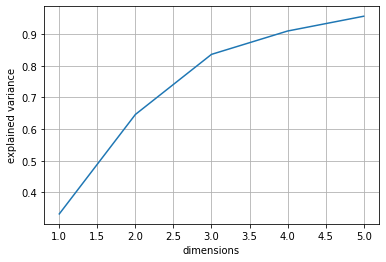

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# import the original data set from .csv-file
with open("dataset_10.csv") as file_name:
    dataset_10 = np.loadtxt(file_name, delimiter=",")

# perform PCA
pca = PCA(n_components = 0.95) # selects number of comp. s.t. amount of variance > 0.95
dataPCA = pca.fit_transform(dataset_10) # reduced data, 5 dimensions

# calculate and plot percentage of variance explained by each of the selected components
cumsum5 = np.cumsum(pca.explained_variance_ratio_)
print(cumsum5)
plt.plot([1,2,3,4,5],cumsum5)
plt.grid(True)
plt.xlabel('dimensions')
plt.ylabel('explained variance')

Further reduction of dimensionality for visualisation

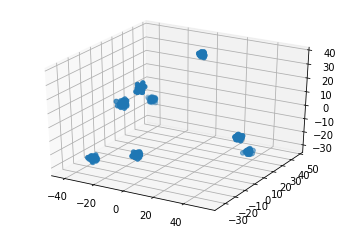

In [2]:
# reduce to 3-dimensional data
pca_visu = PCA(n_components=3) 
data_visu = pca_visu.fit_transform(dataset_10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_visu[:,0], data_visu[:,1], data_visu[:,2])

# Determining number of clusters

Using Silhouette score

[0.3853182598016093, 0.4233339251384248, 0.5829753719549761, 0.7065701137683794, 0.7826706860487298, 0.8505620390162867, 0.9342335179986636, 0.8436802501215632, 0.7359516965456983]


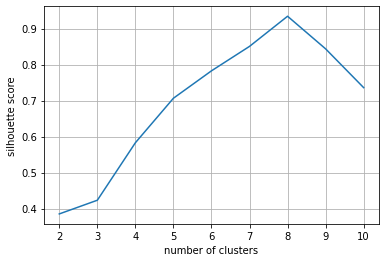

In [3]:
# Calculating the Silhouette score for different numbers of clusters
from sklearn.mixture import GaussianMixture
from sklearn import metrics

scores =[] # for storing the scores
for i in range(2,11):
    # Set the model and its parameters
    model = GaussianMixture(n_components=i, init_params='kmeans', n_init=20)
    # Fit the model 
    pred = model.fit_predict(dataPCA)
    # Calculate silhoutte score and append to list
    scores.append(metrics.silhouette_score(dataPCA, pred, metric='euclidean'))
print(scores)

# Visualise the Silhouette scores
plt.plot([2,3,4,5,6,7,8,9,10], scores)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.grid(True)
plt.show()

Using BIC and AIC

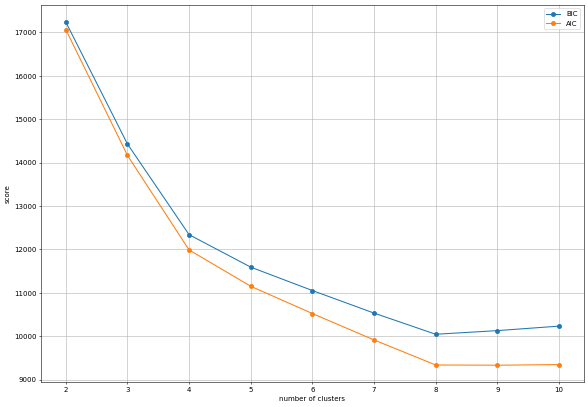

In [4]:
# set up range of numbers of clusters to try
n_range = range(2,11)

# lists for storing the values
bic_vals = []
aic_vals = []

# loop through range and fit GMMs
for n in n_range:
    gm = GaussianMixture(n_components=n, n_init=20, init_params='kmeans')
    gm.fit(dataPCA)
    
    # append BIC and AIC to the lists
    bic_vals.append(gm.bic(dataPCA))
    aic_vals.append(gm.aic(dataPCA))
  
# plot the BIC and AIC values
fig, ax = plt.subplots(figsize=(14,10), dpi=50)
ax.plot(n_range, bic_vals, '-o', label='BIC')
ax.plot(n_range, aic_vals, '-o', label='AIC')
ax.set(xlabel='number of clusters', ylabel='score')
ax.set_xticks(n_range)
ax.grid(True)
ax.legend()

# GMM fitting

Choosing between initialisation methods

In [7]:
# testing the two different initialisation methods "kmeans" and "random"

from datetime import datetime
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn import mixture

# kmeans
times = []
f = 0
while f <= 100: # run it 100 times
  start_time = datetime.now()
  model = mixture.GaussianMixture(n_components=8, init_params='kmeans', n_init=5)
  labels = model.fit_predict(dataPCA)
  end_time = datetime.now()
  times.append(end_time - start_time)
  f += 1
print('Results for kmeans:')
print('Mean time: %s' % np.mean(times))
print('Silhouette score: %s' % metrics.silhouette_score(dataPCA, labels, metric='euclidean'))
print('Calinski Harabasz score: %s' % metrics.calinski_harabasz_score(dataPCA, labels))
print('Davies Bouldin score: %s' % metrics.davies_bouldin_score(dataPCA, labels))

# random
times = []
f = 0
while f <= 100: # run it 100 times
  start_time = datetime.now()
  model = mixture.GaussianMixture(n_components=8, n_init=5, init_params='random')
  labels = model.fit_predict(dataPCA)
  end_time = datetime.now()
  times.append(end_time - start_time)
  f += 1
print('\nResults for random:')
print('Mean time: %s' % np.mean(times))
print('Silhouette score: %s' % metrics.silhouette_score(dataPCA, labels, metric='euclidean'))
print('Calinski Harabasz score: %s' % metrics.calinski_harabasz_score(dataPCA, labels))
print('Davies Bouldin score: %s' % metrics.davies_bouldin_score(dataPCA, labels))

Results for kmeans:
Mean time: 0:00:00.044103
Silhouette score: 0.9342335179986636
Calinski Harabasz score: 35344.3125185668
Davies Bouldin score: 0.09297213108283037

Results for random:
Mean time: 0:00:00.154234
Silhouette score: 0.836076967896001
Calinski Harabasz score: 1477.4317998051683
Davies Bouldin score: 1.0538367628347671


Training the model and predicting the labels

Silhouette score: 0.9342335179986636
Means: [[  4.30037608  30.52860322  34.99629864  23.6611658   -2.36953918]
 [  3.24283778 -31.77670238 -12.1873967    2.6576006   -9.16101354]
 [ 51.00231774  -3.64657248  -1.61223214   0.33499178  18.91311086]
 [ -0.8209866  -21.40805701  29.9300559  -12.87966418 -13.019042  ]
 [-39.8297277   45.03611126 -12.46534381  -8.06417066   3.09764268]
 [ 38.62400656  27.73224178 -28.62081041  -7.06907299 -13.53339591]
 [-28.2600111  -29.32816214 -22.87931053  18.56495525   2.94306589]
 [-17.95822814 -14.0803506   12.71111167 -17.35112973  12.27568729]]
Weights: [0.12109375 0.12890625 0.12109375 0.12695312 0.13476562 0.11132812
 0.13085938 0.125     ]
Covariances: [[[ 0.84638554  0.07912606  0.06536612 -0.46671424  0.37549978]
  [ 0.07912606  0.30857603 -0.20195399 -0.08759513  0.01752306]
  [ 0.06536612 -0.20195399  1.07224932 -0.42227331  0.13371987]
  [-0.46671424 -0.08759513 -0.42227331  1.23899139 -0.0960081 ]
  [ 0.37549978  0.01752306  0.13371987 -0.

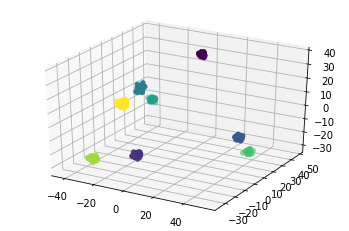

In [8]:
# using "kmeans" initalisation because it prooved more accurate in the previous cell
model = mixture.GaussianMixture(init_params='kmeans', n_components=8, n_init=20)
labels = model.fit_predict(dataPCA)

print('Silhouette score: %s' % metrics.silhouette_score(dataPCA, labels, metric='euclidean'))
# parameters of the fitted model
print('Means: %s' % model.means_)
print('Weights: %s' % model.weights_)
print('Covariances: %s' % model.covariances_)

# Visualisation of the clusters in the three most significant dimensions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataPCA[:,0], dataPCA[:,1], dataPCA[:,2], c=labels)

In [9]:
print('Labels: %s' % labels)

Labels: [0 0 2 4 2 7 0 2 4 5 6 4 7 6 6 6 1 0 6 2 0 0 6 4 7 1 0 6 0 3 3 0 0 1 0 7 7
 3 6 6 0 6 4 3 4 3 2 4 6 5 5 3 3 1 1 5 1 6 5 5 7 6 1 1 7 6 3 3 5 4 3 2 3 2
 4 1 6 1 5 3 6 3 0 7 2 1 6 4 1 4 2 5 1 1 6 6 3 1 3 3 4 1 2 3 1 1 3 3 7 7 7
 0 5 0 5 4 3 5 7 3 5 0 5 1 5 3 3 3 2 3 5 3 5 4 5 1 3 5 0 1 2 5 7 6 5 1 0 6
 4 6 3 1 6 3 5 0 4 7 3 7 4 2 5 5 7 0 6 7 1 7 6 4 4 6 4 4 3 2 1 4 0 3 4 3 5
 7 2 6 4 7 4 6 0 0 5 7 0 2 6 6 5 7 3 7 5 3 0 3 6 2 2 5 6 4 2 7 4 6 2 7 4 3
 7 2 6 1 3 4 3 4 0 4 2 7 0 5 6 3 5 0 2 1 2 2 7 6 7 7 4 1 5 5 2 7 4 2 2 7 7
 1 7 7 7 0 4 5 6 6 5 0 3 2 6 2 1 2 2 4 0 1 1 7 4 2 2 0 4 0 0 1 1 3 1 0 7 0
 1 4 0 7 5 1 2 0 3 3 2 6 7 5 5 0 6 2 7 3 5 4 4 0 1 2 7 4 0 2 2 1 3 0 1 7 4
 2 1 6 6 7 7 7 0 5 2 3 1 5 7 2 1 4 5 1 3 1 1 5 1 1 4 3 0 7 2 5 6 2 4 2 4 1
 2 5 2 1 2 0 6 0 4 3 6 7 2 3 1 7 3 2 6 1 6 0 4 5 6 3 1 3 4 3 4 2 6 6 7 3 0
 6 4 5 0 3 4 0 4 0 5 6 0 4 4 6 4 0 6 1 5 3 2 3 6 1 4 6 6 2 3 3 1 4 1 4 1 2
 5 3 4 3 6 6 7 0 6 7 0 6 5 0 6 7 5 1 5 1 5 2 2 1 1 4 2 4 7 2 4 0 7 4 7 6 4
 7 1 2 7 7 4 7 7 